In [76]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from sklearn.metrics import r2_score

In [4]:
def get_equation():
    var_names = ['sMin', 'sDiff', 'orderType', 'deliveryType'] 
    eq = ""
    for powers in poly.powers_:
        eq += "  +"
        for idx, p in enumerate(powers):
            if p == 1:
                eq = eq + " " + var_names[idx]
            if p == 2:
                eq = eq + " " + var_names[idx] + "2"
            if p == 3:
                eq = eq + " " + var_names[idx] + "3"

In [82]:
def make_regression(x_train, y_train, x_test, y_test, poly):
    model = LinearRegression().fit(x_train,y_train)
    
    names = poly.get_feature_names(["sMin", "sDiff", "orderType", "deliveryType"])    
    equation = "{:.12f}".format(model.intercept_)
    for idx, name in enumerate(names):
        equation += " + {:.12f}".format(model.coef_[idx]) + " " + name
        
    print(equation)
    
    print(model.score(x_test, y_test))
    y_pred = model.predict(x_test)
    y_pred = [max(0,i) for i in y_pred]
    
    print(r2_score(y_test, y_pred))
    
    fig = plt.figure(figsize=(18,8))
    grid = GridSpec(2, 2, height_ratios=[1,1], figure=fig)

    ax1 = fig.add_subplot(grid[:, 0])
    ax1.grid(linewidth=1)
    ax1.scatter(y_test, y_pred, s=27)
    lims = [
            np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
            np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax1.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax1.set_aspect('equal')
    ax1.set_xlim(lims)
    ax1.set_ylim(lims)
    ax1.set_xlabel('target')
    ax1.set_ylabel('Predicted')

    error = y_test - y_pred
    ax2 = fig.add_subplot(grid[0, 1])
    ax2.grid(linewidth=1)
    ax2.hist(error)
    ax2.set_title('Error Histogram')

    ax3 = fig.add_subplot(grid[1, 1])
    ax3.grid(linewidth=1)
    ax3.scatter(y_test, error, s=27)
    ax3.axhline(0, color='red', linestyle='--', linewidth=1.5)
    ax3.set_xlabel('target')
    ax3.set_ylabel('Error')
    
    return model

In [23]:
data_train = np.loadtxt("lhd_50.txt")
data_test = np.loadtxt("random_100.txt")

x_train = data_train[:, :4]
y_train = data_train[:, 4:]

x_test = data_test[:, :4]
y_test = data_test[:, 4:]

poly = PolynomialFeatures(3, include_bias=False).fit(x_train)
x_train = poly.transform(x_train)
x_test = poly.transform(x_test)

Custo de Estoque
118.237290083772 + -1.560363452608 sMin + -1.556201013390 sDiff + -2.337559550758 orderType + -22.089073815403 deliveryType + 0.006135136368 sMin^2 + 0.012470928683 sMin sDiff + 0.014396259698 sMin orderType + 0.166776999838 sMin deliveryType + 0.005586082559 sDiff^2 + 0.019427648601 sDiff orderType + 0.165820582310 sDiff deliveryType + 0.144579617927 orderType^2 + 0.060376842820 orderType deliveryType + 1.275641910306 deliveryType^2 + -0.000003854228 sMin^3 + -0.000016925104 sMin^2 sDiff + -0.000036102021 sMin^2 orderType + -0.000205554712 sMin^2 deliveryType + -0.000011257846 sMin sDiff^2 + 0.000016473543 sMin sDiff orderType + -0.000370771529 sMin sDiff deliveryType + -0.000460606806 sMin orderType^2 + -0.000054766380 sMin orderType deliveryType + -0.003086994884 sMin deliveryType^2 + -0.000000524613 sDiff^3 + -0.000120940592 sDiff^2 orderType + -0.000185483832 sDiff^2 deliveryType + -0.000480405361 sDiff orderType^2 + -0.000775843418 sDiff orderType deliveryType + 

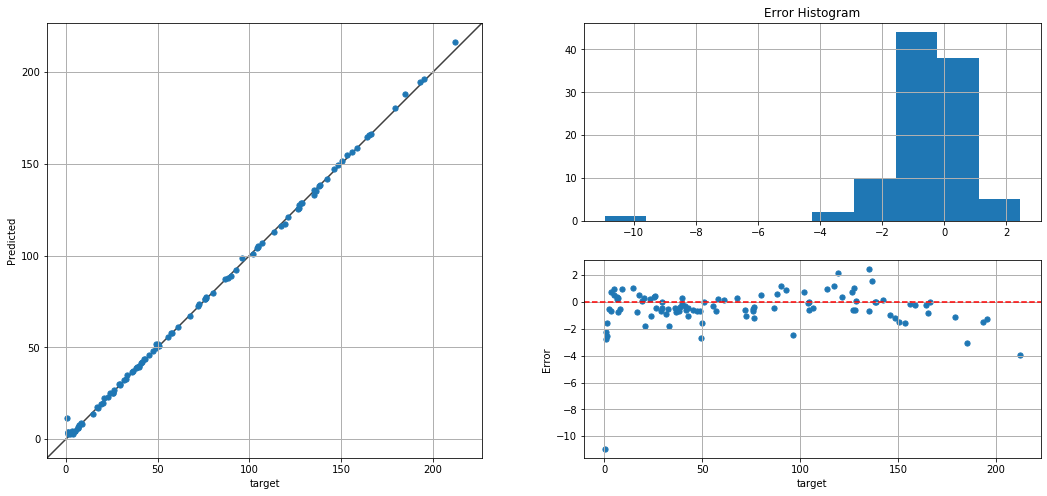

In [83]:
print("Custo de Estoque")
m1 = make_regression(x_train, y_train[:,0], x_test, y_test[:,0], poly)

Custo de Falta
1710.628768356833 + -12.910875055087 sMin + -12.678016304584 sDiff + -14.758771794164 orderType + -167.708673146196 deliveryType + 0.031016055537 sMin^2 + 0.061203407458 sMin sDiff + 0.092903653510 sMin orderType + 0.846876514262 sMin deliveryType + 0.027533585839 sDiff^2 + 0.103457769730 sDiff orderType + 0.831555163307 sDiff deliveryType + 0.858478197008 orderType^2 + 0.368436728092 orderType deliveryType + 5.467184170560 deliveryType^2 + -0.000020146826 sMin^3 + -0.000081979260 sMin^2 sDiff + -0.000191558388 sMin^2 orderType + -0.001025940299 sMin^2 deliveryType + -0.000056775659 sMin sDiff^2 + 0.000131571847 sMin sDiff orderType + -0.001793064277 sMin sDiff deliveryType + -0.003650619757 sMin orderType^2 + -0.001319366028 sMin orderType deliveryType + -0.016255651332 sMin deliveryType^2 + -0.000000761521 sDiff^3 + -0.000590333358 sDiff^2 orderType + -0.000928932723 sDiff^2 deliveryType + -0.004485897402 sDiff orderType^2 + -0.002895354352 sDiff orderType deliveryType

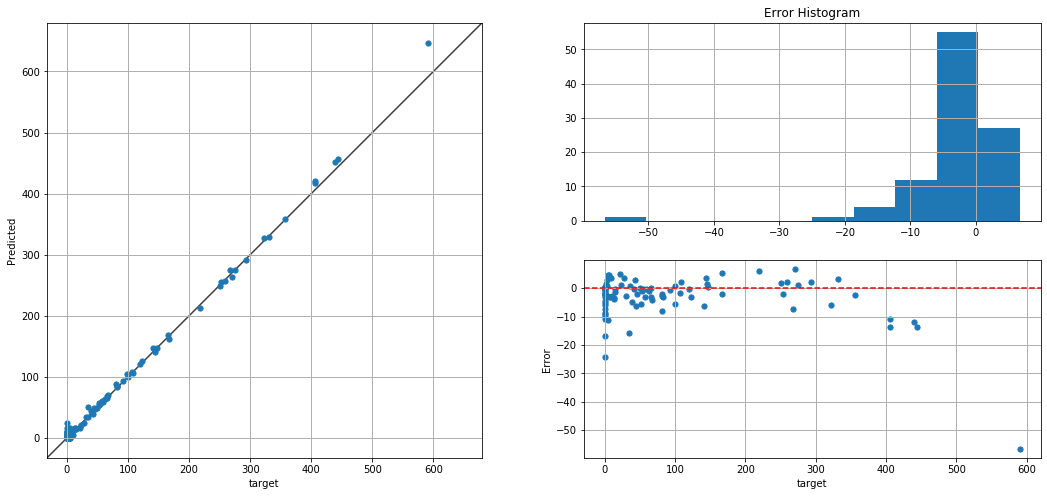

In [84]:
print("Custo de Falta")
m2 = make_regression(x_train, y_train[:,1], x_test, y_test[:,1], poly)

Custo de Ordem
93.896301554204 + -0.034126509516 sMin + -0.096055291729 sDiff + -6.609064529700 orderType + 1.459221243308 deliveryType + 0.000515022809 sMin^2 + 0.000278208963 sMin sDiff + -0.012123422100 sMin orderType + -0.002174475578 sMin deliveryType + 0.001635272870 sDiff^2 + -0.001245197375 sDiff orderType + -0.005841838542 sDiff deliveryType + 1.836117200813 orderType^2 + 0.078968352313 orderType deliveryType + 0.010847903839 deliveryType^2 + -0.000001725653 sMin^3 + 0.000000074907 sMin^2 sDiff + 0.000037581184 sMin^2 orderType + -0.000004025821 sMin^2 deliveryType + -0.000001508380 sMin sDiff^2 + -0.000008047450 sMin sDiff orderType + -0.000019338802 sMin sDiff deliveryType + 0.000181674778 sMin orderType^2 + -0.000007564295 sMin orderType deliveryType + 0.000469546775 sMin deliveryType^2 + -0.000008841324 sDiff^3 + 0.000027008324 sDiff^2 orderType + 0.000003770463 sDiff^2 deliveryType + 0.000190705828 sDiff orderType^2 + -0.000210029526 sDiff orderType deliveryType + 0.00083

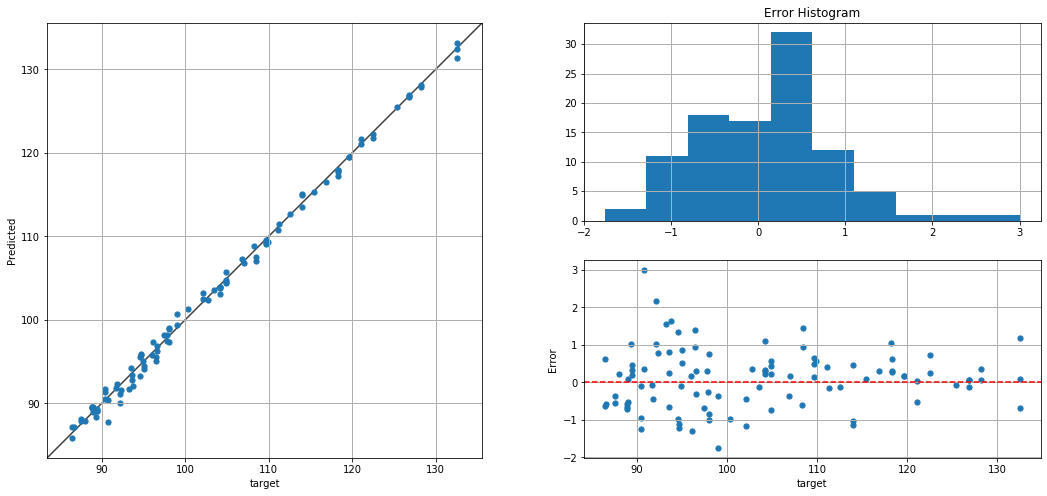

In [85]:
print("Custo de Ordem")
m3 = make_regression(x_train, y_train[:,2], x_test, y_test[:,2], poly)

Custo de Total
1922.762360009604 + -14.505365017210 sMin + -14.330272609703 sDiff + -23.705395874621 orderType + -188.338525718291 deliveryType + 0.037666214715 sMin^2 + 0.073952545104 sMin sDiff + 0.095176491107 sMin orderType + 1.011479038521 sMin deliveryType + 0.034754941268 sDiff^2 + 0.121640220956 sDiff orderType + 0.991533907075 sDiff deliveryType + 2.839175015749 orderType^2 + 0.507781923225 orderType deliveryType + 6.753673984704 deliveryType^2 + -0.000025726706 sMin^3 + -0.000098829457 sMin^2 sDiff + -0.000190079225 sMin^2 orderType + -0.001235520832 sMin^2 deliveryType + -0.000069541886 sMin sDiff^2 + 0.000139997940 sMin sDiff orderType + -0.002183174608 sMin sDiff deliveryType + -0.003929551786 sMin orderType^2 + -0.001381696703 sMin orderType deliveryType + -0.018873099441 sMin deliveryType^2 + -0.000010127457 sDiff^3 + -0.000684265626 sDiff^2 orderType + -0.001110646092 sDiff^2 deliveryType + -0.004775596935 sDiff orderType^2 + -0.003881227297 sDiff orderType deliveryType

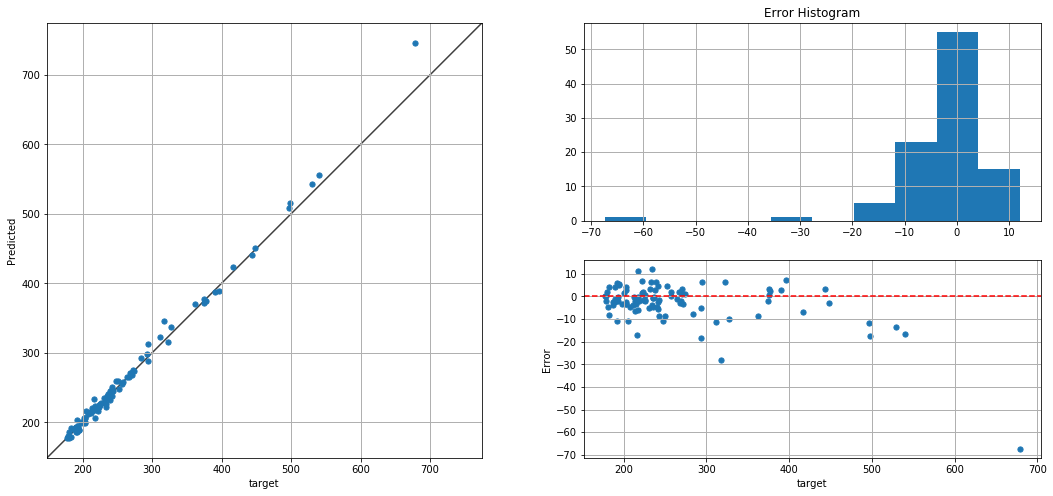

In [32]:
print("Custo de Total")
m4 = make_regression(x_train, y_train.sum(axis=1), x_test, y_test.sum(axis=1), poly)

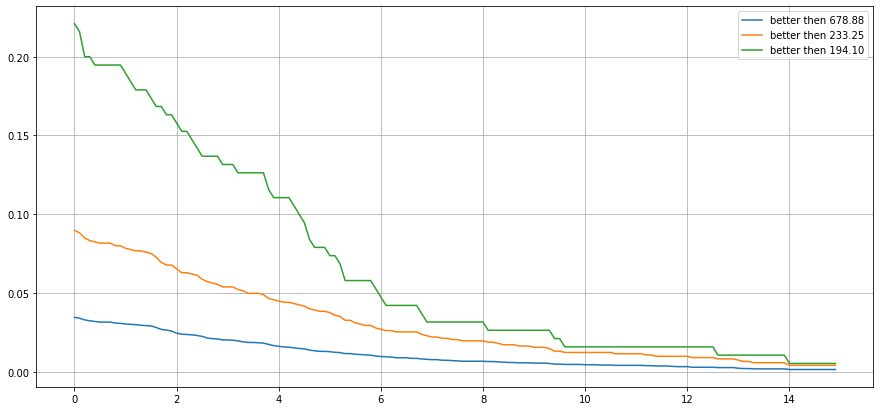

In [28]:
from itertools import combinations 

cost = y_test.sum(axis=1)
cost_pred = m4.predict(x_test)
sort_idx = np.argsort(cost)

limit_range = np.arange(0,15,0.1)
plt.figure(figsize=(15, 7))

for k in [100, 50, 20]:
    c = cost[sort_idx[:k]]
    cp = cost_pred[sort_idx[:k]]
    results = []
    for limit in limit_range:
        prob = []
        for i,j in combinations(range(len(c)), 2):
            true_r = c[i] < c[j]
            if (abs(cp[i] - cp[j]) < limit):
                pred_r = true_r
            else:
                pred_r = cp[i] < cp[j]

            prob.append(true_r != pred_r)
        prob = sum(prob)/len(prob)
        results.append(prob)
    plt.plot(limit_range, results, label="better then {:.2f}".format(max(c)))

plt.legend()
plt.grid()
plt.show()

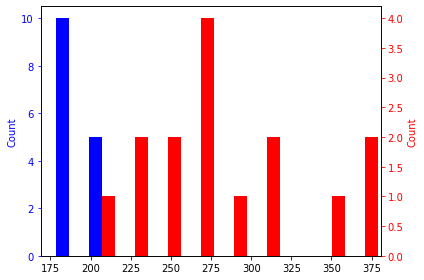

In [250]:
alpha = 10

viable = y_test[(y_test[:, 0] <=100) & (y_test[:, 1] <=30), :]
ct_viable = viable.sum(axis=1)

inviable = y_test[(y_test[:, 0] > 100) | (y_test[:, 1] >30), :]
inviability = lambda i,j: alpha*(max(0, i - 100) + max(0, j - 30))
inviability = np.vectorize(inviability)
ct_inviable = inviable.sum(axis=1) + inviability(inviable[:,0], inviable[:,1])
ct_inviable.sort()
ct_inviable = ct_inviable[:len(ct_viable)]

# plt.boxplot([ct_viable, ct_inviable])
# plt.boxplot()

colors = ['blue', 'red']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.hist([ct_viable, ct_inviable], color=colors)
n, bins, patches = ax1.hist([ct_viable,ct_inviable])
ax1.cla() #clear the axis

#plots the histogram data
width = (bins[1] - bins[0]) * 0.4
bins_shifted = bins + width
ax1.bar(bins[:-1], n[0], width, align='edge', color=colors[0])
ax2.bar(bins_shifted[:-1], n[1], width, align='edge', color=colors[1])

#finishes the plot
ax1.set_ylabel("Count", color=colors[0])
ax2.set_ylabel("Count", color=colors[1])
ax1.tick_params('y', colors=colors[0])
ax2.tick_params('y', colors=colors[1])
plt.tight_layout()
plt.show()

In [241]:
ct_inviable

array([ 700.51344,  926.54349,  505.27669,  251.08406, 1011.63008,
        609.13336, 1135.15454,  745.52002,  618.53035,  280.86384,
       2585.40211,  228.77525,  457.41952, 2208.27812,  854.32274,
        346.01869,  511.53273,  597.45661,  733.32912, 1360.26585,
       1017.68752,  237.18287,  835.6838 , 1407.64781, 1415.86555,
        836.79677,  923.41938, 1279.88862, 1635.43896,  266.63228,
        575.64259, 3338.47717,  481.73362, 1076.39142,  566.64439,
        471.63197, 1144.61292, 2829.72754,  432.4083 , 3713.21448,
        715.92875,  299.41842,  911.44675,  273.98252,  204.94814,
        909.05327,  320.18701,  396.09486,  522.43344, 4621.10368,
       4679.11526,  586.69668, 1665.61471,  691.06372,  439.38356,
        628.11691, 3025.78758, 4260.67654,  273.01017,  507.80392,
        943.82275, 2797.99186,  599.25879, 2739.73735,  738.30665,
       1243.66037,  514.59964,  754.00978,  780.90804,  302.98826,
        378.01217, 1439.26976,  511.44922,  724.62997,  383.26

In [ ]:
cost = y_test.sum(axis=1) 
cost_pred = m4.predict(x_test)
sort_idx = np.argsort(cost)

limit_range = np.arange(0,15,0.1)
plt.figure(figsize=(15, 7))

for k in [100, 50, 20]:
    c = cost[sort_idx[:k]]
    cp = cost_pred[sort_idx[:k]]
    results = []
    for limit in limit_range:
        prob = []
        for i,j in combinations(range(len(c)), 2):
            true_r = c[i] < c[j]
            if (abs(cp[i] - cp[j]) < limit):
                pred_r = true_r
            else:
                pred_r = cp[i] < cp[j]

            prob.append(true_r != pred_r)
        prob = sum(prob)/len(prob)
        results.append(prob)
    plt.plot(limit_range, results, label="better then {:.2f}".format(max(c)))

plt.legend()
plt.grid()
plt.show()

In [46]:
x = np.loadtxt("pop_1000.txt")
poly = PolynomialFeatures(3, include_bias=False).fit(x)
x = poly.transform(x)
results = m2.predict(x) 

results.sort()
print(results.mean() + results.std())
print(results[:500].mean() + results[:500].std())
print(results[:10].mean() + results[:10].std())

results[:10]

# data_test = np.loadtxt("random_100.txt")

# x_train = data_train[:, :4]
# y_train = data_train[:, 4:]

# x_test = data_test[:, :4]
# y_test = data_test[:, 4:]

# poly = PolynomialFeatures(3, include_bias=False).fit(x_train)
# x_train = poly.transform(x_train)
# x_test = poly.transform(x_test)

214.40802519356623
15.918124142240192
-7.1861770327779455


array([-11.48265669, -10.36956276,  -9.23124504,  -8.66893228,
        -8.39174324,  -8.00081834,  -7.47763573,  -7.42422778,
        -7.33660818,  -7.12738443])

In [88]:
x = np.loadtxt("pop_10.txt")
x = poly.transform(x[:,:4])
[max(0,i) for i in m4.predict(x)]

[216.53975142124455,
 237.464994298899,
 364.6508819419796,
 234.86258367765822,
 202.28063906801435,
 240.5683652589887,
 234.7542014627129,
 292.13417646787025,
 222.6183659853682,
 208.33979627516032]